In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


In [2]:
titanic_data = fetch_openml("titanic", version=1, as_frame=True)


In [3]:
df = titanic_data['data']

In [4]:

df['survived'] = titanic_data['target']

In [5]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


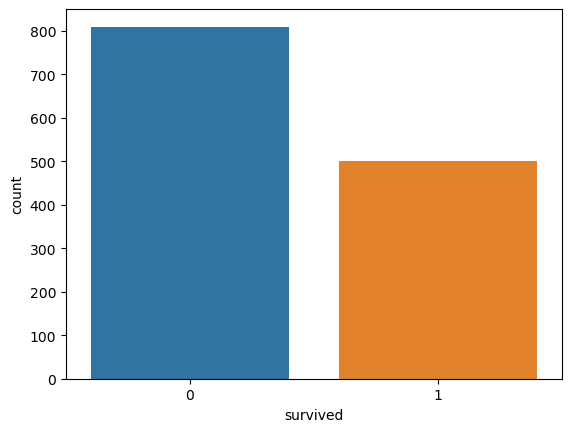

In [6]:
sns.countplot(x="survived", data =df)
plt.show()

In [7]:
df['travelled_alone'] = (df['sibsp'] + df['parch'] == 0)

In [8]:
df.drop(['sibsp', 'parch'], axis=1, inplace=True)

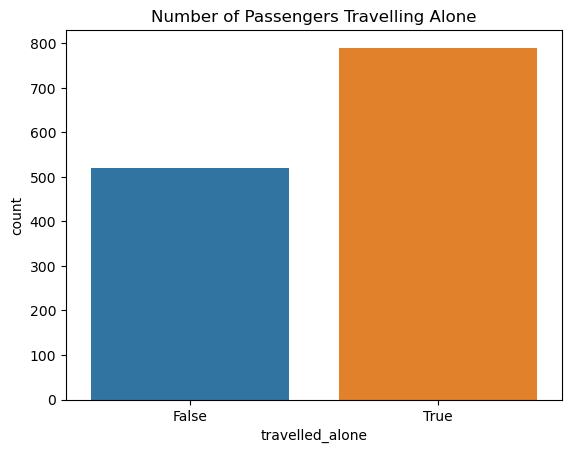

In [9]:
sns.countplot(x="travelled_alone", data=df)
plt.title("Number of Passengers Travelling Alone")
plt.show()

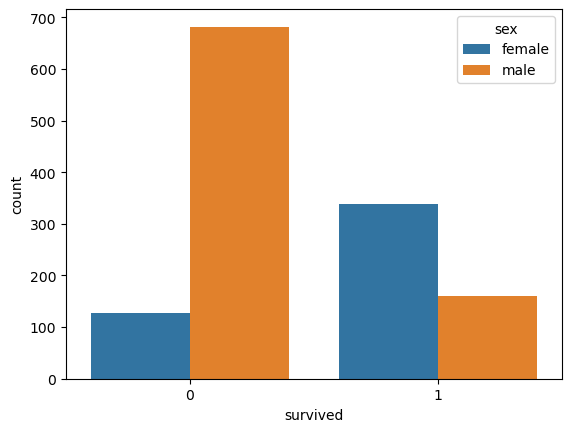

In [10]:
sns.countplot(x="survived",hue= "sex", data =df)
plt.show()

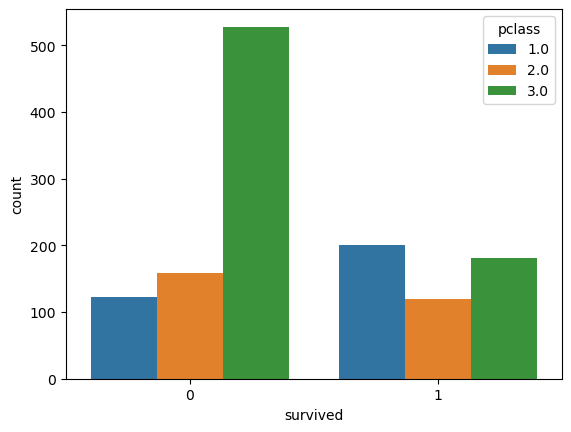

In [11]:
sns.countplot(x="survived",hue= "pclass", data =df)
plt.show()

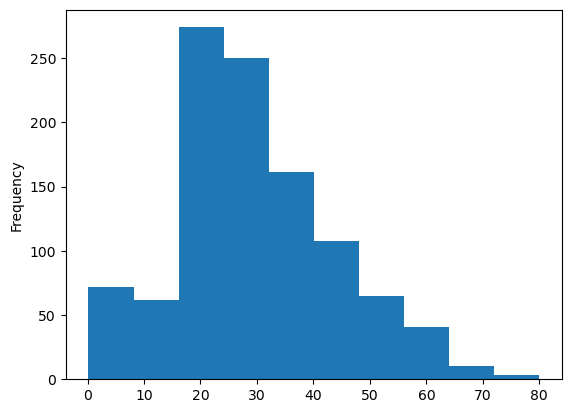

In [12]:
df['age'].plot.hist()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pclass           1309 non-null   float64 
 1   name             1309 non-null   object  
 2   sex              1309 non-null   category
 3   age              1046 non-null   float64 
 4   ticket           1309 non-null   object  
 5   fare             1308 non-null   float64 
 6   cabin            295 non-null    object  
 7   embarked         1307 non-null   category
 8   boat             486 non-null    object  
 9   body             121 non-null    float64 
 10  home.dest        745 non-null    object  
 11  survived         1309 non-null   category
 12  travelled_alone  1309 non-null   bool    
dtypes: bool(1), category(3), float64(4), object(5)
memory usage: 97.6+ KB


In [14]:
df.isnull().sum()

pclass                0
name                  0
sex                   0
age                 263
ticket                0
fare                  1
cabin              1014
embarked              2
boat                823
body               1188
home.dest           564
survived              0
travelled_alone       0
dtype: int64

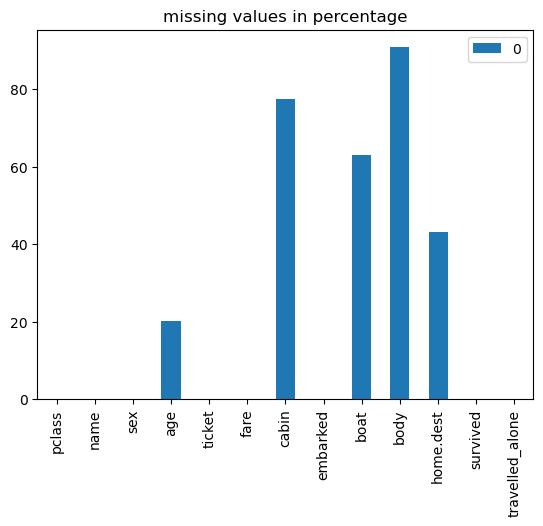

In [15]:
miss_vals = pd.DataFrame(df.isnull().sum()/len(df)*100)

miss_vals.plot(kind = 'bar',title = 'missing values in percentage')
plt.show()

In [16]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,travelled_alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,True
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,False
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,False
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,False
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,False


In [17]:
df.drop(['name','ticket','home.dest'],axis = 1,inplace = True)

In [18]:
df.head()

,pclass,sex,age,fare,cabin,embarked,boat,body,survived,travelled_alone
0,1.0,female,29.0000,211.3375,B5,S,2,NaN,1,True
1,1.0,male,0.9167,151.5500,C22 C26,S,11,NaN,1,False
2,1.0,female,2.0000,151.5500,C22 C26,S,None,NaN,0,False
3,1.0,male,30.0000,151.5500,C22 C26,S,None,135.0,0,False
4,1.0,female,25.0000,151.5500,C22 C26,S,None,NaN,0,False


In [20]:
df.drop(['cabin','body','boat'],axis = 1,inplace = True)

In [21]:
df.head()

,pclass,sex,age,fare,embarked,survived,travelled_alone
0,1.0,female,29.0000,211.3375,S,1,True
1,1.0,male,0.9167,151.5500,S,1,False
2,1.0,female,2.0000,151.5500,S,0,False
3,1.0,male,30.0000,151.5500,S,0,False
4,1.0,female,25.0000,151.5500,S,0,False


In [22]:
sex = pd.get_dummies(df['sex'],drop_first = True)
print(sex)


      male
0        0
1        1
2        0
3        1
4        0
...    ...
1304     0
1305     0
1306     1
1307     1
1308     1

[1309 rows x 1 columns]


In [23]:
df['sex']= sex

In [24]:
df.isnull().sum()

pclass               0
sex                  0
age                263
fare                 1
embarked             2
survived             0
travelled_alone      0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy ='mean')

In [26]:
df['age'] = imp_mean.fit_transform(df[['age']])
df['fare'] = imp_mean.fit_transform(df[['fare']])

In [27]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           2
survived           0
travelled_alone    0
dtype: int64

In [28]:
imp_freq = SimpleImputer(strategy = 'most_frequent')

In [29]:
df['embarked'] = imp_freq.fit_transform(df[['embarked']])

In [30]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           0
survived           0
travelled_alone    0
dtype: int64

In [31]:
df.head()

,pclass,sex,age,fare,embarked,survived,travelled_alone
0,1.0,0,29.0000,211.3375,S,1,True
1,1.0,1,0.9167,151.5500,S,1,False
2,1.0,0,2.0000,151.5500,S,0,False
3,1.0,1,30.0000,151.5500,S,0,False
4,1.0,0,25.0000,151.5500,S,0,False


In [32]:
embark = pd.get_dummies(df['embarked'], drop_first = True)
print(embark)

      Q  S
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
1304  0  0
1305  0  0
1306  0  0
1307  0  0
1308  0  1

[1309 rows x 2 columns]


In [33]:
df.drop(['embarked'],axis =1, inplace = True)
df = pd.concat([df,embark], axis =1)

In [34]:
df.head()

,pclass,sex,age,fare,survived,travelled_alone,Q,S
0,1.0,0,29.0000,211.3375,1,True,0,1
1,1.0,1,0.9167,151.5500,1,False,0,1
2,1.0,0,2.0000,151.5500,0,False,0,1
3,1.0,1,30.0000,151.5500,0,False,0,1
4,1.0,0,25.0000,151.5500,0,False,0,1


In [35]:
X = df.drop(['survived'], axis =1)
X.head()

,pclass,sex,age,fare,travelled_alone,Q,S
0,1.0,0,29.0000,211.3375,True,0,1
1,1.0,1,0.9167,151.5500,False,0,1
2,1.0,0,2.0000,151.5500,False,0,1
3,1.0,1,30.0000,151.5500,False,0,1
4,1.0,0,25.0000,151.5500,False,0,1


In [36]:
y = df['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

In [38]:
print(X_train.shape, y_train.shape)

(916, 7) (916,)


In [39]:
print(X_test.shape, y_test.shape)

(393, 7) (393,)


In [40]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train, y_train)

LogisticRegression()

In [42]:
pred = mod.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7837150127226463

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[204,  32],
       [ 53, 104]], dtype=int64)